# Loading the Dataset

In [5]:
import os
import pandas as pd


def load_data_from_directory(directory):
    data_list = pd.DataFrame()

    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        df = pd.read_csv(path, header=None, delim_whitespace=True)
        data_list = pd.concat([data_list, df], axis=1)

    return data_list


X = load_data_from_directory('./har/UCI HAR Dataset/train/Inertial Signals/')
X

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.022859,0.010316,0.013250,0.017751,0.002553,0.007725,0.004325,0.010617,0.017189,0.010511,...,0.100058,0.098564,0.093177,0.088742,0.090505,0.094843,0.098350,0.100385,0.099874,0.094987
1,0.012268,0.016150,0.015895,0.012671,0.008774,0.005685,0.006093,0.008383,0.011140,0.012406,...,0.094537,0.098759,0.101977,0.095360,0.089466,0.095126,0.099496,0.093535,0.089035,0.090612
2,0.002159,-0.000272,0.002631,0.003376,0.000057,0.001268,-0.001209,-0.002290,0.000451,-0.000389,...,0.085343,0.087155,0.084546,0.082166,0.081972,0.081413,0.081936,0.083011,0.082334,0.081487
3,-0.000873,-0.005482,-0.004678,-0.000221,0.001588,0.009021,0.020953,0.028212,0.028609,0.024456,...,0.088112,0.087322,0.083738,0.082701,0.084490,0.082785,0.084084,0.085761,0.083275,0.081404
4,-0.001574,0.000201,-0.000970,-0.000673,-0.000693,-0.002041,-0.000265,-0.000217,-0.001554,-0.000895,...,0.088028,0.090312,0.088713,0.086957,0.086522,0.081640,0.079652,0.081329,0.085397,0.088816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.456170,0.700776,0.997301,1.004445,0.722260,0.384807,0.080493,-0.179432,-0.397329,-0.459786,...,-0.115192,-0.086700,-0.101805,-0.095273,-0.029541,0.026907,0.069472,0.086288,0.099188,0.129060
7348,0.453560,0.670788,0.676179,0.495978,0.281462,0.096833,0.036042,-0.002569,-0.148088,-0.354664,...,0.028204,0.045156,0.058035,0.064945,0.089264,0.108987,0.150238,0.199324,0.236369,0.253029
7349,0.300847,0.351178,0.272351,0.161631,0.092803,0.060685,0.138459,0.258722,0.418766,0.620477,...,-0.117974,-0.080109,-0.015432,0.031859,0.072452,0.065696,0.079038,0.111295,0.126302,0.188621
7350,0.217504,0.158497,0.186879,0.192339,0.240986,0.281897,0.219482,0.228801,0.417526,0.721561,...,-0.032441,-0.001154,0.028541,0.052355,0.040251,0.060450,0.108725,0.128925,0.172251,0.210071


In [4]:
from keras.src.utils import np_utils

y = pd.read_csv('./har/UCI HAR Dataset/train/y_train.txt', header=None, names=['label']).apply(lambda x: x - 1)
y = np_utils.to_categorical(y, num_classes=6)
y

2023-11-20 16:51:45.932700: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-20 16:51:45.958470: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 16:51:45.958499: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 16:51:45.958517: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 16:51:45.963582: I tensorflow/core/platform/cpu_feature_g

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

FileNotFoundError: [Errno 2] No such file or directory: '/har/UCI HAR Dataset/test/Inertial Signals'

<Axes: ylabel='0'>

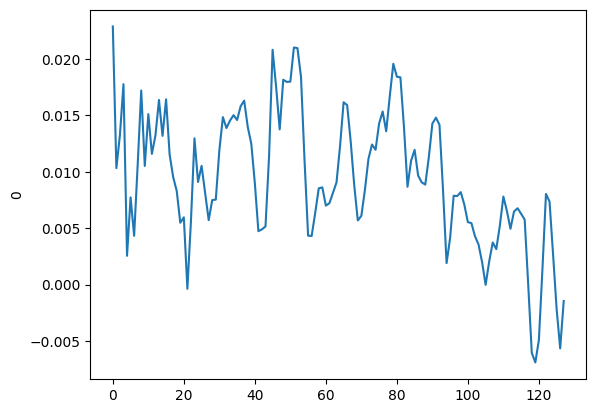

In [14]:
import seaborn as sns

sns.lineplot(data=X.iloc[0, :128])


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.reshape(X, (X.shape[0], 128, 9))

n = 0.3
random_seed = 42
np.random.seed(random_seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n, random_state=random_seed)
X_train

array([[[ 7.444528e-03,  8.082362e-03,  7.115643e-03, ...,
          1.361828e-02,  1.313051e-02,  1.098634e-02],
        [ 1.129898e-02,  1.038845e-02,  7.688675e-03, ...,
         -5.563611e-04,  5.996594e-03,  7.585662e-03],
        [ 3.258421e-03,  1.892993e-03,  3.631367e-03, ...,
          6.870157e-03,  1.019717e-02,  1.379477e-02],
        ...,
        [ 3.745792e-01,  3.736133e-01,  3.734996e-01, ...,
          3.780925e-01,  3.785737e-01,  3.761818e-01],
        [ 3.772079e-01,  3.795622e-01,  3.791982e-01, ...,
          3.807958e-01,  3.807741e-01,  3.782379e-01],
        [ 3.761816e-01,  3.777229e-01,  3.835955e-01, ...,
          3.766034e-01,  3.743967e-01,  3.781184e-01]],

       [[-3.129910e-01, -3.439550e-01, -3.010926e-01, ...,
         -6.696151e-02, -1.084866e-01, -8.447845e-02],
        [-1.060563e-01, -1.659076e-01, -2.743576e-01, ...,
         -5.626635e-01, -5.646347e-01, -5.184951e-01],
        [-4.240707e-01, -3.262385e-01, -3.006115e-01, ...,
         -5.24

In [47]:
X_heldback = load_data_from_directory("./har/UCI HAR Dataset/test/Inertial Signals")
X_heldback = np.reshape(X_heldback, (X_heldback.shape[0], 128, 9))
y_heldback = pd.read_csv('./har/UCI HAR Dataset/test/y_test.txt', header=None, names=['label']).apply(lambda x: x - 1)
y_heldback = np_utils.to_categorical(y_heldback, num_classes=6)

In [33]:
from keras.src.layers import Dense, LSTM
from keras import Sequential, metrics

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(6))
model.compile(optimizer='adam', loss='mae',  metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
161/161 [==============================] - 5s 21ms/step - loss: 0.1608 - accuracy: 0.3002
Epoch 2/10
161/161 [==============================] - 3s 21ms/step - loss: 0.1532 - accuracy: 0.3410
Epoch 3/10
161/161 [==============================] - 3s 21ms/step - loss: 0.1493 - accuracy: 0.3840
Epoch 4/10
161/161 [==============================] - 3s 21ms/step - loss: 0.1456 - accuracy: 0.4458
Epoch 5/10
161/161 [==============================] - 3s 21ms/step - loss: 0.1321 - accuracy: 0.4613
Epoch 6/10
161/161 [==============================] - 3s 21ms/step - loss: 0.1256 - accuracy: 0.5152
Epoch 7/10
161/161 [==============================] - 3s 21ms/step - loss: 0.1265 - accuracy: 0.4961
Epoch 8/10
161/161 [==============================] - 3s 21ms/step - loss: 0.1218 - accuracy: 0.5402
Epoch 9/10
161/161 [==============================] - 3s 22ms/step - loss: 0.1202 - accuracy: 0.5655
Epoch 10/10
161/161 [==============================] - 3s 22ms/step - loss: 0.1204 - accura

In [35]:
model.evaluate(X_test, y_test)

69/69 [==============================] - 1s 7ms/step - loss: 0.1186 - accuracy: 0.5598


[0.11860194802284241, 0.5598368048667908]

## Timeseries Classification Transformer
See https://keras.io/examples/timeseries/timeseries_classification_transformer/

In [40]:
from keras.src.optimizers import Adam
import keras
from keras import Input, Model
from keras.src.layers import MultiHeadAttention, Dropout, LayerNormalization, Conv1D, GlobalAveragePooling1D


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(6, activation="softmax")(x)
    return Model(inputs, outputs)

input_shape = X_train.shape[1:]
model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-4),
    metrics=["categorical_accuracy"],
)
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 9)]             0         []                            
                                                                                                  
 multi_head_attention_8 (Mu  (None, 128, 9)               39945     ['input_3[0][0]',             
 ltiHeadAttention)                                                   'input_3[0][0]']             
                                                                                                  
 dropout_18 (Dropout)        (None, 128, 9)               0         ['multi_head_attention_8[0][0]
                                                                    ']                            
                                                                                            

In [41]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
model.fit(
    X_train,
    y_train,
    validation_split=0.3,
    epochs=50,
    batch_size=10,
    callbacks=callbacks,
)

Epoch 1/20
65/65 [==============================] - 42s 607ms/step - loss: 1.7701 - categorical_accuracy: 0.2920 - val_loss: 1.6115 - val_categorical_accuracy: 0.4495
Epoch 2/20
65/65 [==============================] - 40s 616ms/step - loss: 1.5658 - categorical_accuracy: 0.4123 - val_loss: 1.4427 - val_categorical_accuracy: 0.5359
Epoch 3/20
65/65 [==============================] - 44s 676ms/step - loss: 1.4277 - categorical_accuracy: 0.4451 - val_loss: 1.3203 - val_categorical_accuracy: 0.5631
Epoch 4/20
65/65 [==============================] - 43s 660ms/step - loss: 1.3302 - categorical_accuracy: 0.4740 - val_loss: 1.2322 - val_categorical_accuracy: 0.5874
Epoch 5/20
65/65 [==============================] - 43s 656ms/step - loss: 1.2545 - categorical_accuracy: 0.5070 - val_loss: 1.1717 - val_categorical_accuracy: 0.6117
Epoch 6/20
65/65 [==============================] - 42s 642ms/step - loss: 1.1939 - categorical_accuracy: 0.5296 - val_loss: 1.1169 - val_categorical_accuracy: 0.606

In [48]:
model.evaluate(X_heldback, y_heldback)

93/93 [==============================] - 11s 123ms/step - loss: 5.0671 - categorical_accuracy: 0.1469


[5.067129135131836, 0.1469290852546692]